In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [11]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [12]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
train_data = X_train.join(y_train)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17841,-121.88,37.43,17.0,3469.0,896.0,2762.0,808.0,3.3884,<1H OCEAN,245800.0
275,-122.18,37.79,41.0,1411.0,233.0,626.0,214.0,7.0875,NEAR BAY,240700.0
18795,-122.34,41.06,33.0,2149.0,498.0,631.0,273.0,1.8816,INLAND,65800.0
4688,-118.35,34.07,45.0,3312.0,880.0,1157.0,809.0,3.5719,<1H OCEAN,500001.0
18551,-122.03,36.96,28.0,1607.0,421.0,926.0,385.0,2.4250,NEAR OCEAN,216100.0
...,...,...,...,...,...,...,...,...,...,...
19376,-120.79,37.76,14.0,3531.0,508.0,1505.0,497.0,5.5228,INLAND,275300.0
7121,-118.02,33.91,34.0,2518.0,429.0,1309.0,421.0,4.7861,<1H OCEAN,210700.0
8053,-118.19,33.84,24.0,1228.0,320.0,537.0,273.0,2.2500,NEAR OCEAN,192000.0
6803,-118.13,34.08,40.0,1931.0,449.0,1367.0,446.0,2.5750,<1H OCEAN,228400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

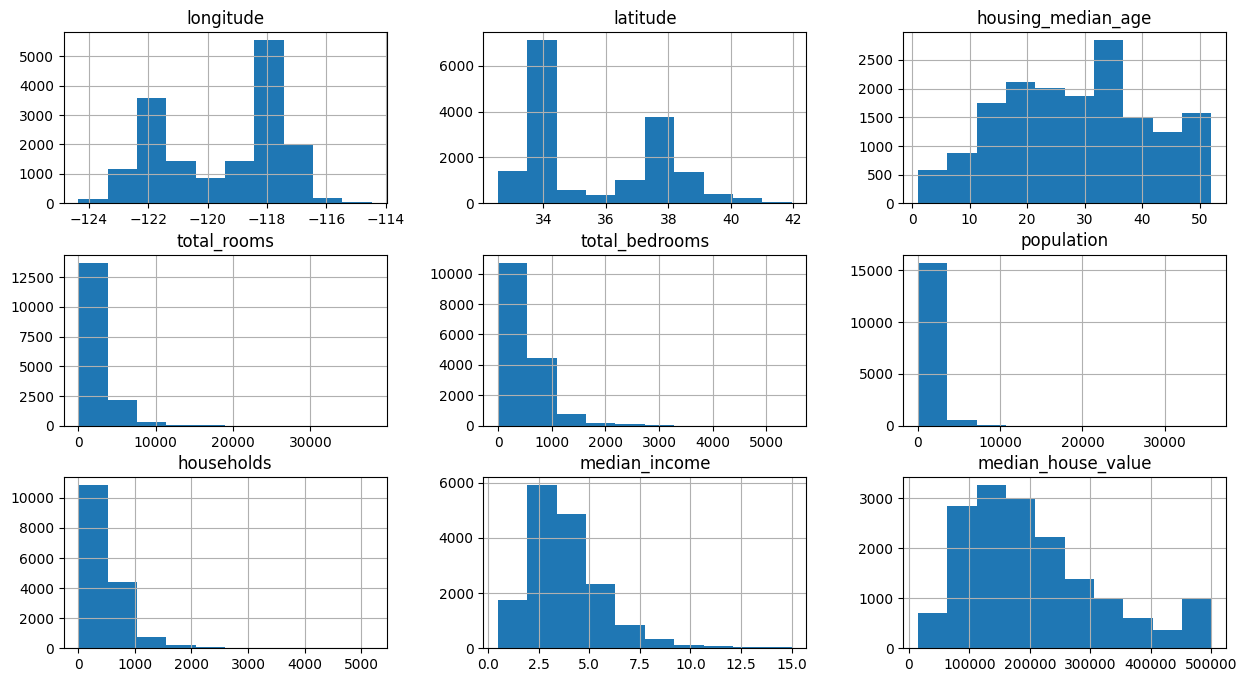

In [16]:
train_data.hist(figsize=(15,8))

<Axes: >

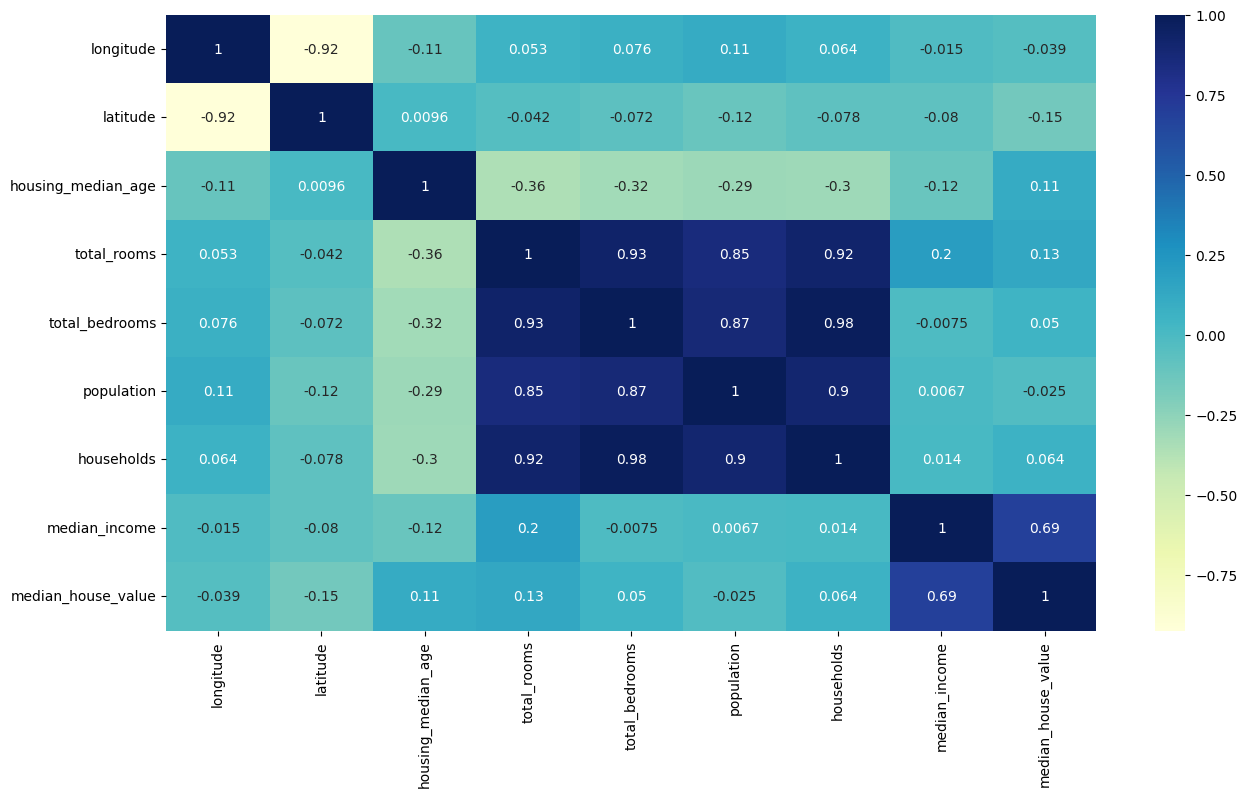

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [20]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

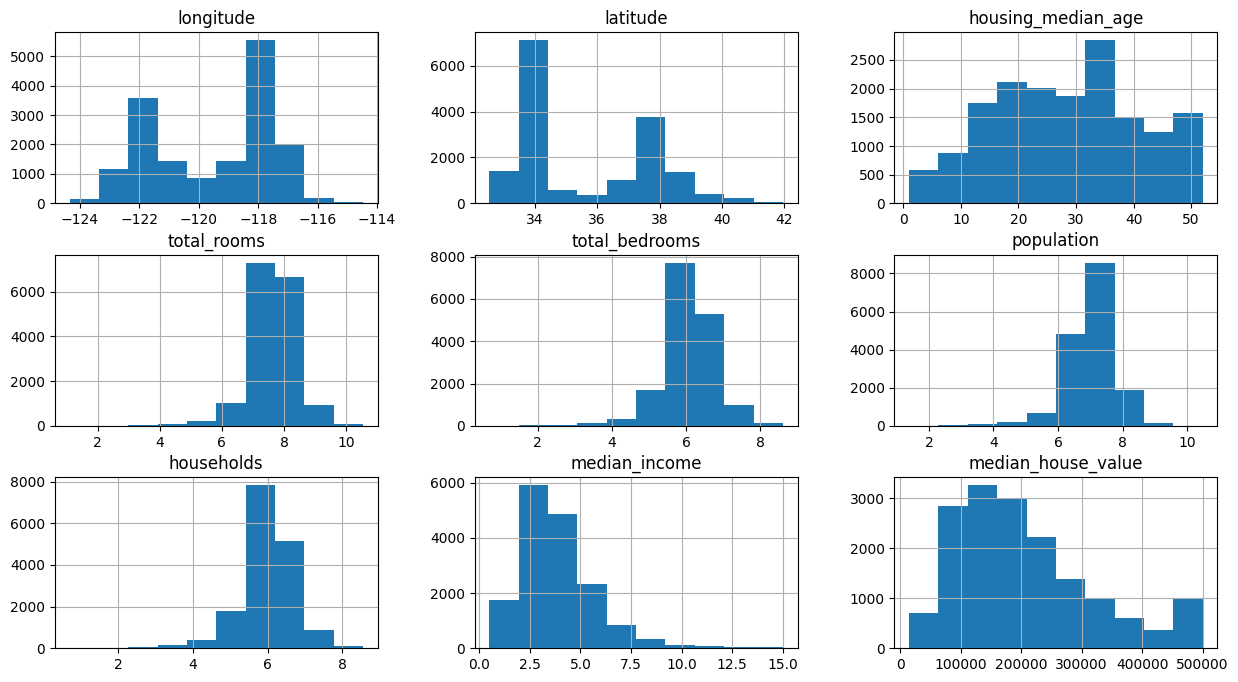

In [21]:
train_data.hist(figsize=(15,8))

In [22]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7215
INLAND        5199
NEAR OCEAN    2089
NEAR BAY      1840
ISLAND           3
Name: count, dtype: int64

In [23]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17841,True,False,False,False,False
275,False,False,False,True,False
18795,False,True,False,False,False
4688,True,False,False,False,False
18551,False,False,False,False,True
...,...,...,...,...,...
19376,False,True,False,False,False
7121,True,False,False,False,False
8053,False,False,False,False,True
6803,True,False,False,False,False


In [24]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17841,-121.88,37.43,17.0,8.151910,6.799056,7.924072,6.695799,3.3884,<1H OCEAN,245800.0,True,False,False,False,False
275,-122.18,37.79,41.0,7.252762,5.455321,6.440947,5.370638,7.0875,NEAR BAY,240700.0,False,False,False,True,False
18795,-122.34,41.06,33.0,7.673223,6.212606,6.448889,5.613128,1.8816,INLAND,65800.0,False,True,False,False,False
4688,-118.35,34.07,45.0,8.105609,6.781058,7.054450,6.697034,3.5719,<1H OCEAN,500001.0,True,False,False,False,False
18551,-122.03,36.96,28.0,7.382746,6.045005,6.831954,5.955837,2.4250,NEAR OCEAN,216100.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19376,-120.79,37.76,14.0,8.169620,6.232448,7.317212,6.210600,5.5228,INLAND,275300.0,False,True,False,False,False
7121,-118.02,33.91,34.0,7.831617,6.063785,7.177782,6.045005,4.7861,<1H OCEAN,210700.0,True,False,False,False,False
8053,-118.19,33.84,24.0,7.113956,5.771441,6.287859,5.613128,2.2500,NEAR OCEAN,192000.0,False,False,False,False,True
6803,-118.13,34.08,40.0,7.566311,6.109248,7.221105,6.102559,2.5750,<1H OCEAN,228400.0,True,False,False,False,False


In [26]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [27]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17841,-121.88,37.43,17.0,8.151910,6.799056,7.924072,6.695799,3.3884,245800.0,True,False,False,False,False
275,-122.18,37.79,41.0,7.252762,5.455321,6.440947,5.370638,7.0875,240700.0,False,False,False,True,False
18795,-122.34,41.06,33.0,7.673223,6.212606,6.448889,5.613128,1.8816,65800.0,False,True,False,False,False
4688,-118.35,34.07,45.0,8.105609,6.781058,7.054450,6.697034,3.5719,500001.0,True,False,False,False,False
18551,-122.03,36.96,28.0,7.382746,6.045005,6.831954,5.955837,2.4250,216100.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19376,-120.79,37.76,14.0,8.169620,6.232448,7.317212,6.210600,5.5228,275300.0,False,True,False,False,False
7121,-118.02,33.91,34.0,7.831617,6.063785,7.177782,6.045005,4.7861,210700.0,True,False,False,False,False
8053,-118.19,33.84,24.0,7.113956,5.771441,6.287859,5.613128,2.2500,192000.0,False,False,False,False,True
6803,-118.13,34.08,40.0,7.566311,6.109248,7.221105,6.102559,2.5750,228400.0,True,False,False,False,False


<Axes: >

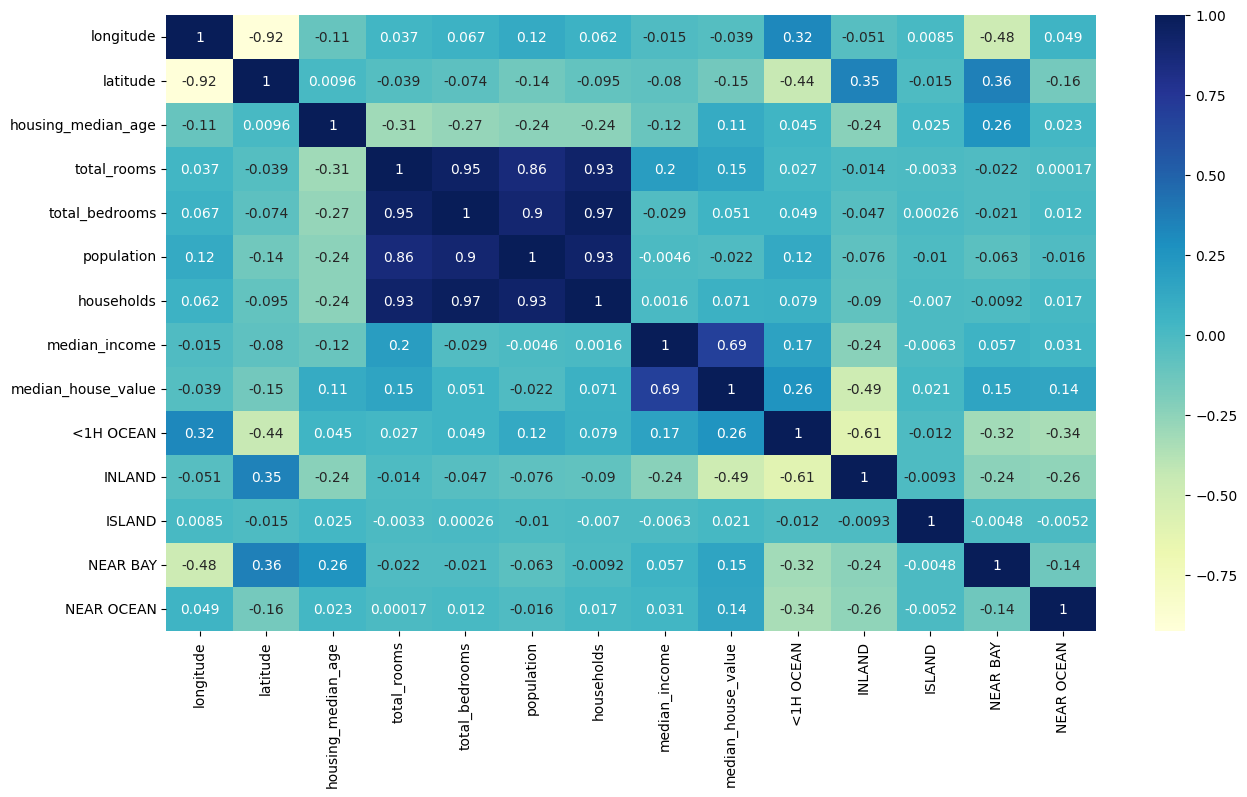

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

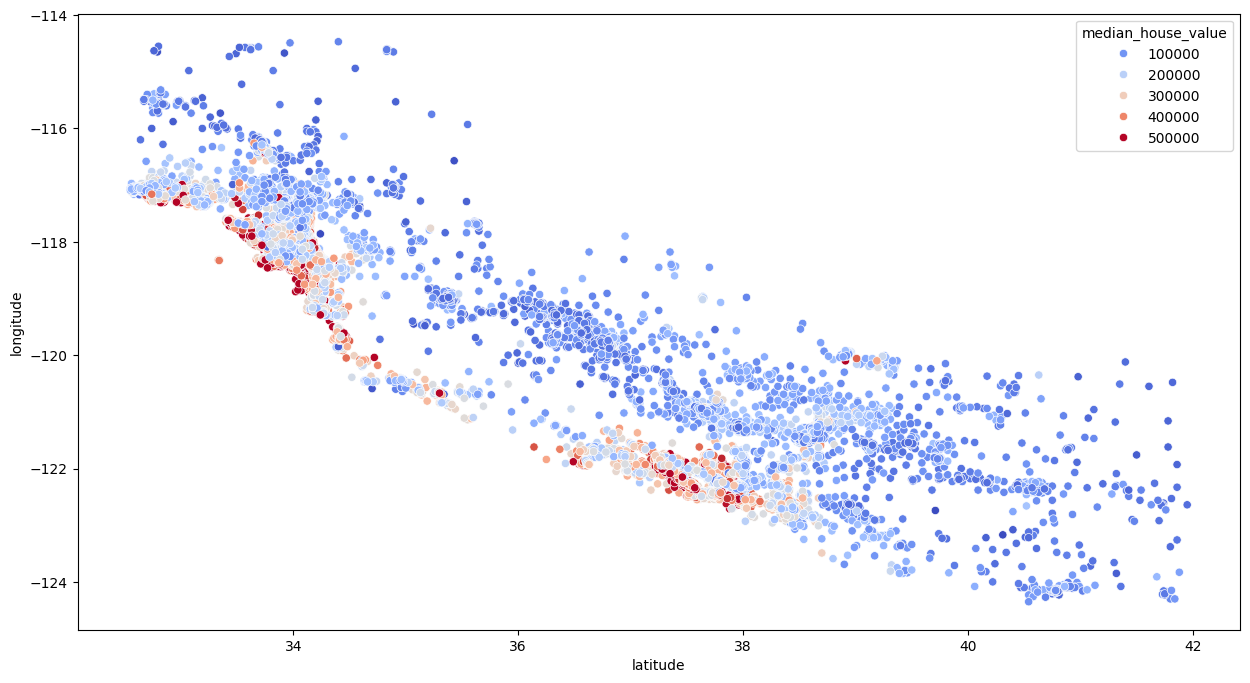

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [32]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households'] 

<Axes: >

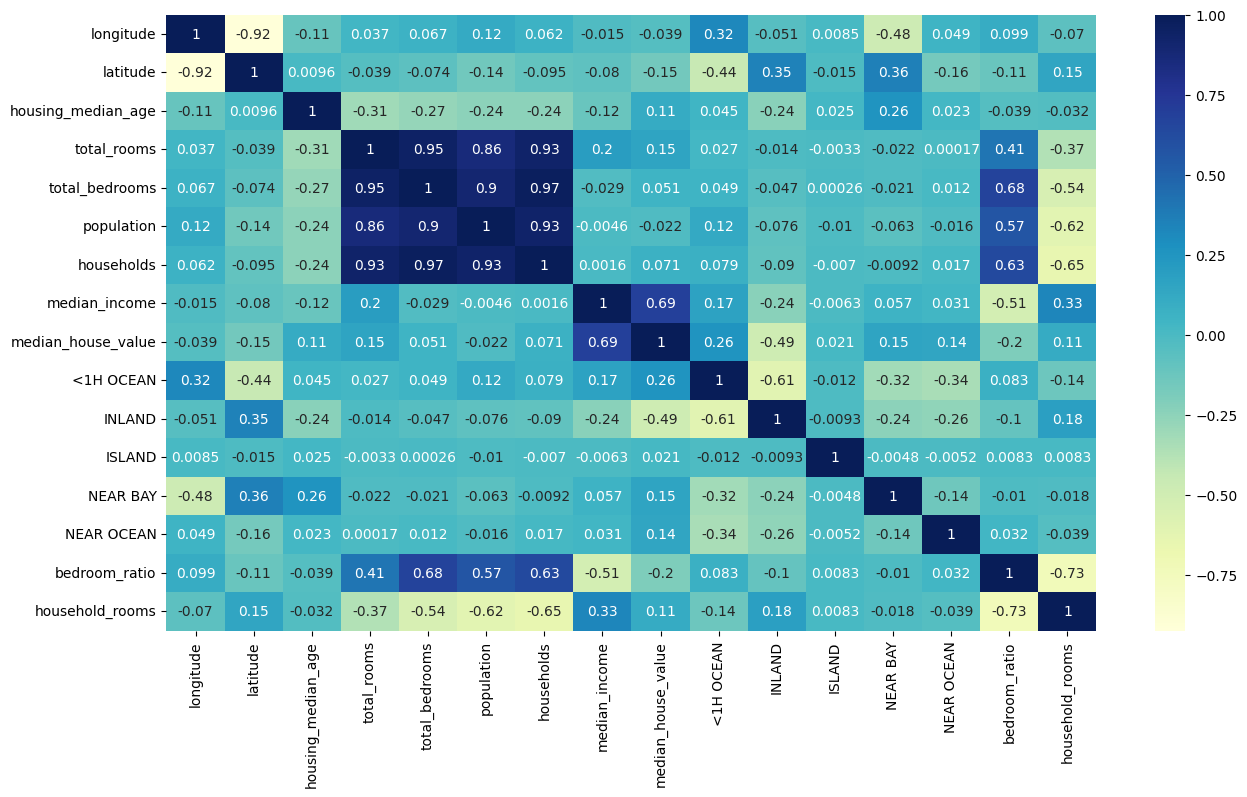

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']


reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [35]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [36]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [37]:
reg.score(X_test, y_test)

0.6721953845279873

In [39]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
forest.score(X_test, y_test)

0.8285732764107362

In [44]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
best_forest = grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [49]:
grid_search.best_estimator_.score(X_test, y_test)

0.8174914999380182